In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.style.use('ggplot')
#sns.set_style("white")

In [398]:
df=pd.read_csv("dataframes/8dealerhit17.csv")
df.shape

(98324, 3)

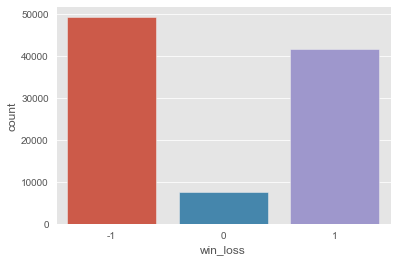

In [399]:
sns.countplot(df.win_loss)
plt.show()

In [400]:
win_percentage=df[df.win_loss==1].shape[0]*100/len(df)
loss_percentage=df[df.win_loss==-1].shape[0]*100/len(df)
draw_percentage=df[df.win_loss==0].shape[0]*100/len(df)

print(f"Win percentage: {int(win_percentage)} %")
print(f"Loss percentage: {int(loss_percentage)} %")
print(f"Draw percentage: {int(draw_percentage)} %")

Win percentage: 42 %
Loss percentage: 50 %
Draw percentage: 7 %


In [401]:
df.sample(n=20)

,win_loss,player_cards,dealer_cards
75265,-1,"[4, 9, 9]","[10, 3, 9]"
72988,1,"[1, 10]","[10, 7]"
86322,1,"[9, 10]","[2, 10, 3, 3]"
84735,-1,"[2, 9]","[1, 10]"
92737,-1,"[2, 4, 3, 6, 2]","[5, 6, 8]"
4255,-1,"[4, 8, 10]","[10, 7]"
92167,1,"[8, 6, 7]","[10, 2, 10]"
67024,1,"[10, 5, 5]","[6, 10, 10]"
64234,-1,"[2, 10, 4, 7]","[3, 9, 10]"
43145,-1,"[9, 10]","[10, 10]"


In [402]:
df["player_cards"]=df.player_cards.str.replace("]","").str.replace("[","")
df["dealer_cards"]=df.dealer_cards.str.replace("]","").str.replace("[","")

players_df=df.player_cards.str.split(",",expand=True)
players_df.columns=["ph"+str(col+1) for col in  players_df.columns]

dealers_df=df.dealer_cards.str.split(",",expand=True)
dealers_df.columns=["dh"+str(col+1) for col in  dealers_df.columns]

df.drop(columns=["player_cards","dealer_cards"],inplace=True)

new_df=pd.concat([df,players_df,dealers_df],axis=1)

new_df.replace(np.nan,0,inplace=True)

In [403]:
#new_df

In [404]:
df.win_loss.sum()

-7719

In [405]:
new_df["pfirst2hand"]=new_df.ph1.astype("int")+new_df.ph2.astype("int")
#new_df["pfirst2hand"]=new_df.ph1.astype("int")+new_df.ph2.astype("int")

In [406]:
new_df

,win_loss,ph1,ph2,ph3,ph4,ph5,ph6,ph7,ph8,dh1,dh2,dh3,dh4,dh5,dh6,dh7,dh8,pfirst2hand
0,-1,10,8,0,0,0,0,0,0,6,2,4,7,0,0,0,0,18
1,-1,10,4,2,6,0,0,0,0,10,3,1,8,0,0,0,0,14
2,-1,10,4,9,0,0,0,0,0,10,10,0,0,0,0,0,0,14
3,-1,10,2,0,0,0,0,0,0,10,1,0,0,0,0,0,0,12
4,1,2,10,7,0,0,0,0,0,10,7,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98319,-1,4,5,10,0,0,0,0,0,2,9,10,0,0,0,0,0,9
98320,1,3,6,2,10,0,0,0,0,10,2,6,0,0,0,0,0,9
98321,1,10,10,0,0,0,0,0,0,6,5,1,4,10,0,0,0,20
98322,-1,10,7,0,0,0,0,0,0,2,3,4,6,4,0,0,0,17


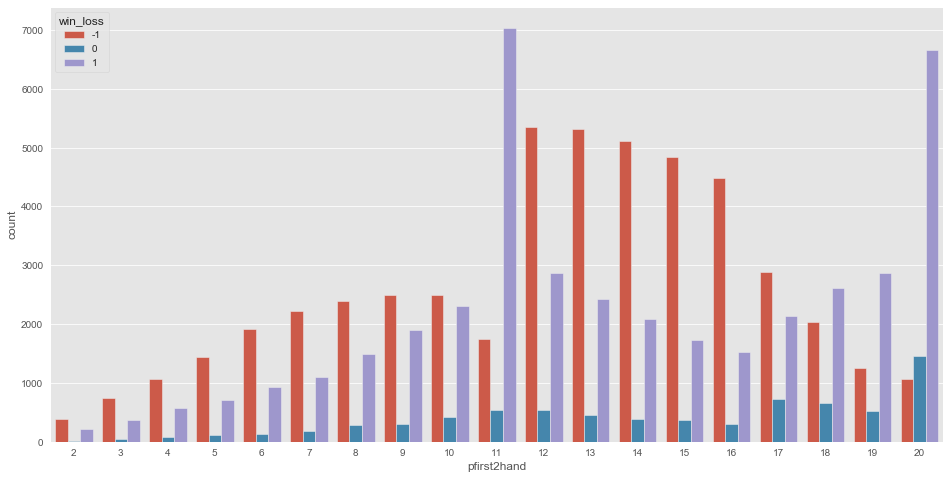

In [407]:
plt.figure(figsize=(16,8))
sns.countplot(new_df.pfirst2hand,hue="win_loss",data=new_df)

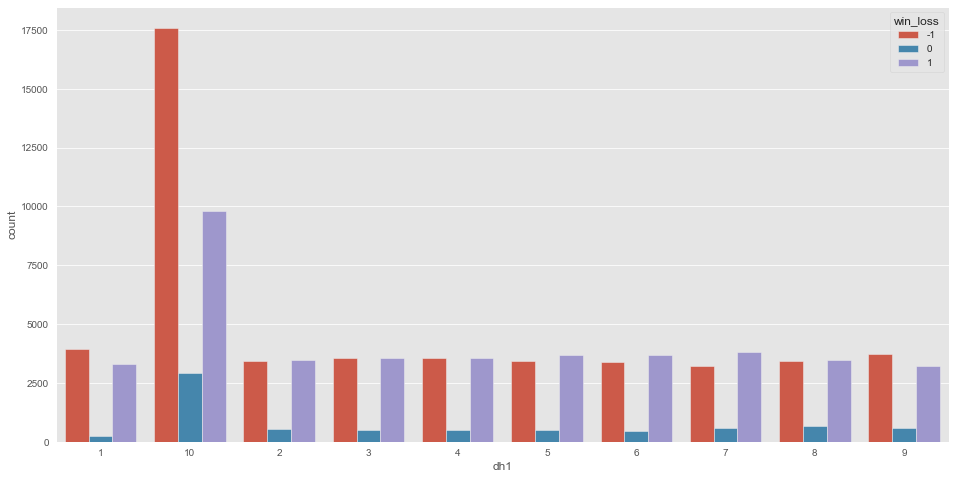

In [408]:
plt.figure(figsize=(16,8))
sns.countplot(new_df.dh1,hue="win_loss",data=new_df)

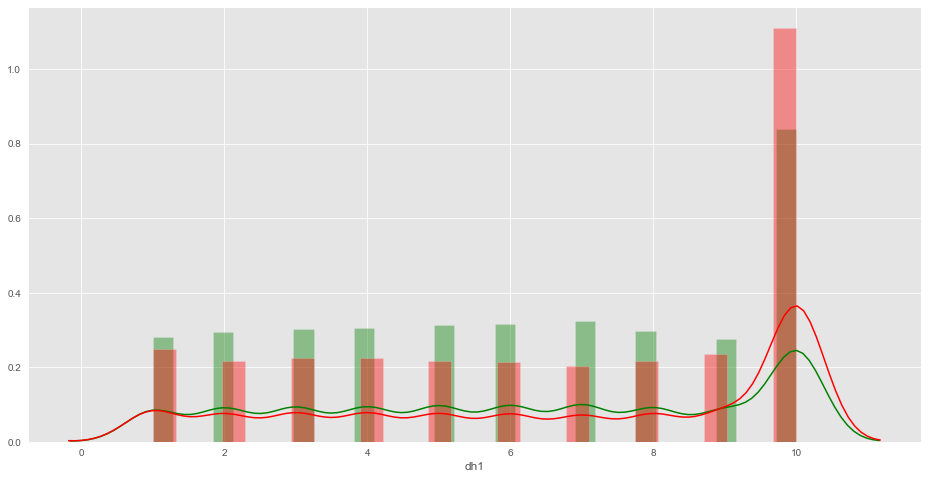

In [409]:
plt.figure(figsize=(16,8))
sns.distplot(new_df[new_df.win_loss==1]["dh1"].astype("int"),color="g")
sns.distplot(new_df[new_df.win_loss==-1]["dh1"].astype("int"),color="r")

In [410]:
new_df[new_df.win_loss==1]["dh1"]

4        10
6         5
11        8
13        8
14        4
         ..
98316     6
98317     1
98318     5
98320    10
98321     6
Name: dh1, Length: 41542, dtype: object

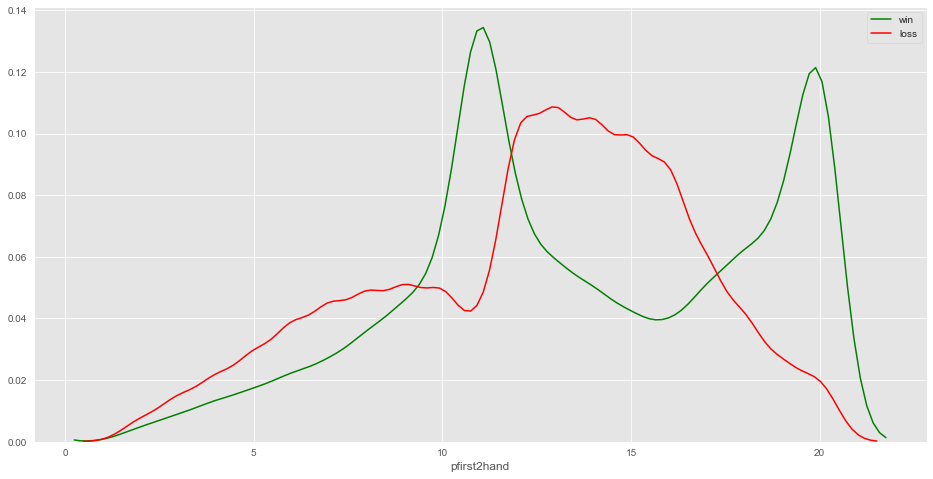

In [411]:
plt.figure(figsize=(16,8))
sns.distplot(new_df[new_df.win_loss==1]["pfirst2hand"].astype("int"),color="g",hist=False,label="win",bins=5)
sns.distplot(new_df[new_df.win_loss==-1]["pfirst2hand"].astype("int"),color="r",hist=False,label="loss",bins=5)
#sns.distplot(new_df[new_df.win_loss==1]["dh1"].astype("int"),color="b")
plt.show()

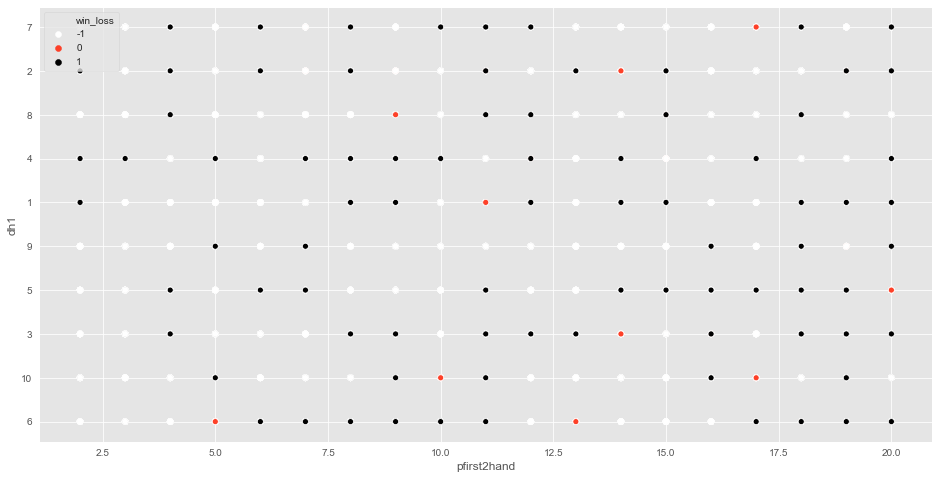

In [412]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="pfirst2hand",y="dh1",data=new_df ,hue="win_loss",palette="CMRmap_r")

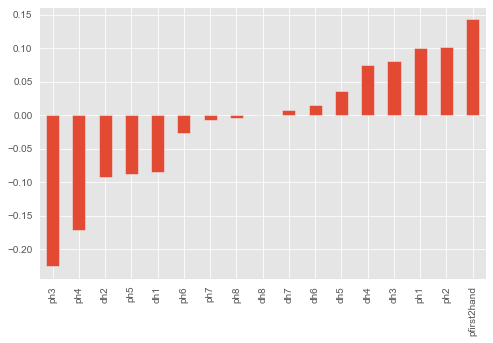

In [413]:
plt.figure(figsize=(8,5))
new_df.astype("int").corr()["win_loss"].sort_values().iloc[:-1].plot(kind="bar")

In [370]:
new_df=new_df.astype("int")